<a href="https://colab.research.google.com/github/meira2024/Proyecto_integrado_2/blob/main/Educacion_Argentina_remeira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random

# Define the number of rows
num_rows = 100

# Create lists of random data for each column
first_names = ['Nombre' + str(i) for i in range(num_rows)]
last_names = ['Apellido' + str(i) for i in range(num_rows)]
dni_numbers = [random.randint(10000000, 50000000) for _ in range(num_rows)]
subjects = ['Matemática', 'Lengua', 'Historia', 'Geografía', 'Ciencias Naturales', 'Inglés']
grades_1st_trimester = [random.randint(1, 10) for _ in range(num_rows)]
grades_2nd_trimester = [random.randint(1, 10) for _ in range(num_rows)]
grades_3rd_trimester = [random.randint(1, 10) for _ in range(num_rows)]
absences = [random.randint(0, 20) for _ in range(num_rows)]

# Create a dictionary with the data
data = {
    'Apellido': last_names,
    'Nombre': first_names,
    'nro_dni': dni_numbers,
    'Materia escolar': [random.choice(subjects) for _ in range(num_rows)],
    'Nota 1er Trimestre': grades_1st_trimester,
    'Nota 2do Trimestre': grades_2nd_trimester,
    'Nota 3er Trimestre': grades_3rd_trimester,
    'Faltas a clases': absences
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
display(df)

,Apellido,Nombre,nro_dni,Materia escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Apellido0,Nombre0,27446995,Inglés,10,3,7,13
1,Apellido1,Nombre1,28632464,Ciencias Naturales,10,10,6,19
2,Apellido2,Nombre2,31270240,Inglés,5,10,10,13
3,Apellido3,Nombre3,48742467,Ciencias Naturales,7,1,10,13
4,Apellido4,Nombre4,43585509,Geografía,1,2,7,18
...,...,...,...,...,...,...,...,...
95,Apellido95,Nombre95,49115402,Geografía,6,8,2,6
96,Apellido96,Nombre96,11016620,Ciencias Naturales,10,3,9,4
97,Apellido97,Nombre97,48147805,Geografía,9,7,3,20
98,Apellido98,Nombre98,18978890,Matemática,5,8,1,16


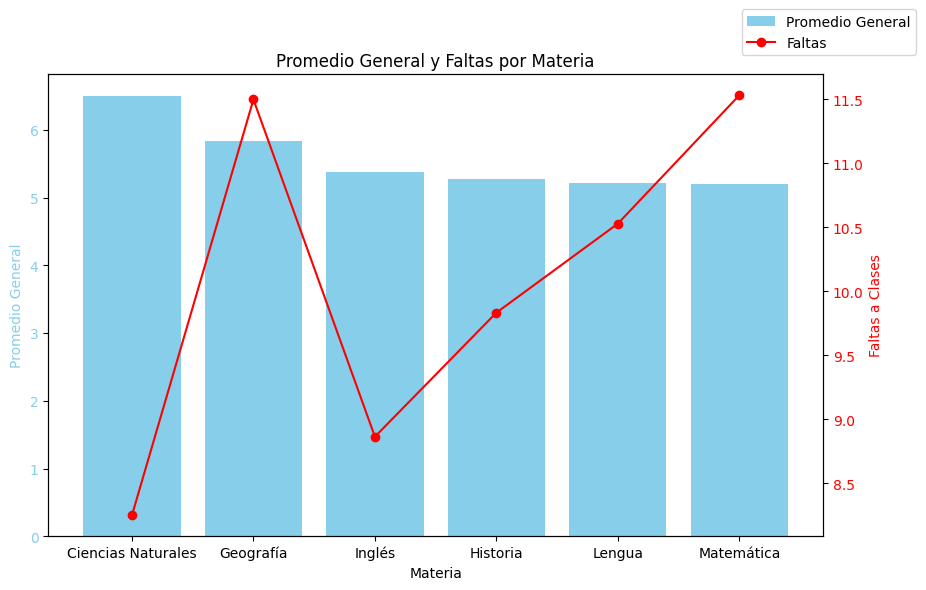

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average grade per subject
subject_avg_grades = df.groupby('Materia escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)
subject_avg_grades = subject_avg_grades.sort_values(ascending=False)

# Calculate average absences per subject
subject_avg_absences = df.groupby('Materia escolar')['Faltas a clases'].mean()
subject_avg_absences = subject_avg_absences.reindex(subject_avg_grades.index)  # Align with grade order

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary axis for average grades
ax1.bar(subject_avg_grades.index, subject_avg_grades.values, color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Secondary axis for absences
ax2 = ax1.twinx()
ax2.plot(subject_avg_absences.index, subject_avg_absences.values, color='red', marker='o', label='Faltas')
ax2.set_ylabel('Faltas a Clases', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends and title
fig.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.title('Promedio General y Faltas por Materia')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()